In [3]:
import cv2

In [4]:
#to read image
#imread() which accepts the image name and loads it into a numpy array.
#NumPy is the fundamental package for scientific computing with Python.

#It helps us to define multidimensional arrays (more than 2 dimensions) which is otherwise impossible to handle.
image = cv2.imread('image.jpg')

In [7]:
image.shape

(808, 766, 3)

In [5]:
#But when an image is loaded into a numpy array, the order of colour inside each pixel changes to BGR due to some computation flaw
#To fix this, cv2 provides us with another function called cvtColor which accepts the image and the order to which it has to be converted.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
#shape of numpy array
image.shape
#The shape of this image is (808, 766, 3) i.e. 808 pixels in length, 766 pixels in breath and 3 units for each pixel.

(808, 766, 3)

In [8]:
#we can reshape the multidimensional array into a 2 dimensional array where 
#Z=M*N
#This will give us an array of Z x 3 dimension, where 
#Z is the count of the pixels, i.e. M x N.
#3 is the R G B values of each pixel.

In [9]:
#we will use the reshape() function which accepts the new dimensions for the multidimensional array. 
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [12]:
from sklearn.cluster import KMeans
K = 3  
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#The K Means instance has an attribute labels_ which returns a list of labels corresponding to each data point.

#We can iterate through this and count the total number of data points belonging to each label as follows:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

In [14]:
#The total number of data points is Z.

#Therefore, we can divide the count of data point corresponding to each label by the total and obtain the percentage values for the same.
#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print (label)

[0.592663443890081, 0.31337570767520617, 0.09396084843471292]


In [15]:
#K Means algorithm has another attribute called cluster_centers_ which returns a list of the centres of each clusteR
print (clf.cluster_centers_)

[[ 22.43891488  21.90808471  20.96797304]
 [254.18388612 254.18080296 254.17905   ]
 [177.66257416 155.04429542  90.56063967]]


In [17]:
#The data type of pixel values is defined by uint8
#This defines that the valid pixel values is an integer and should fall in range [0,255].
#Therefore we need to convert these floating point values to a valid pixel value.

#That is, convert the floating point values to uint8.
centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

In [19]:
#To plot the colour, we need to covert these pixel values of hex colour codes.

#For the conversion to hex codes, we use another amazing python libarary called webcolors.
#webcolors provide us a function called rgb_to_hex which accepts the rgb value of a pixel and returns the corresponding hex code
import webcolors
clr = [webcolors.rgb_to_hex(c) for c in centroids]

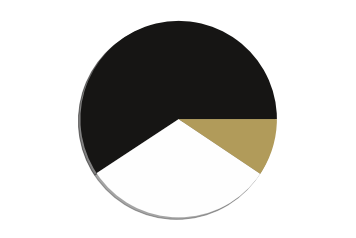

In [22]:
#To plot a pie chart, matplotlib provides a function called pie which accepts the percentage values and the colour codes and outputs a pie chart.
import matplotlib.pyplot as plt
%matplotlib inline
plt.pie(label, colors=clr, shadow=True)
plt.axis('equal')
plt.show()